# Worked out Examples from Report

##### Imports

In [2]:
import numpy as np
import math
import sympy
from itertools import product, combinations
import itertools

##### Build Polytope Description

In [3]:
###construct matrix for matroid independent matroid polytope H-rep
def construct_B_ind_mat(columns):
    #lower bound (orientation stuff)
    B = -1*np.identity(columns,dtype = int)

    #other subset inequalities (related to rank function)
    for k in range(1,columns+1):
        x_combs = np.array([np.array([1 if i in comb else 0 for i in range(columns)],dtype = int) for comb in combinations(np.arange(columns), k)],dtype = int)
        B = np.concatenate((B,x_combs), axis = 0)

    return B;

###construct matrix for matroid base matroid polytope H-rep
###currently incorrect, so needs some work
def construct_B_base_mat(columns):
    #lower bound (orientation stuff)
    B = -1*np.identity(columns,dtype = int)
    
    #other subset inequalities (related to rank function)
    for k in range(1,columns+1):
        x_combs = np.array([np.array([1 if i in comb else 0 for i in range(columns)],dtype = int) for comb in combinations(np.arange(columns), k)],dtype = int)
        B = np.concatenate((B,x_combs), axis = 0)

    return B;

def construct_A_base_mat(columns):
    #basis constraint
    A = np.ones((1,columns),dtype = int)

    return A;

##### Naive Circuit Enumeration

In [7]:
#####chase's naive alrogithm circuit code (https://github.com/charles-viss/circuits/blob/master/naive_algorithm.py)
#naive approach for enumerating C(A,B)
#Input: A_eq and B_ineq are (m_a x n) and (m x n) numpy arrays
#Output: list of circuits (elementary vectors) in C(A,B) given by n-dimensional numpy arrays
def enumerate_circuits(B_ineq, A_eq=None):
    B = sympy.Matrix(B_ineq)
    m,n = B.shape
    r = 0
    if A_eq is not None:
        A = sympy.Matrix(A_eq)
        A, pivot_columns = A.rref()    #use reduced echelon form of A
        r = len(pivot_columns)         #r is the rank of A

    circuits = []
    pos_circs = []
    for I in itertools.combinations(range(m),n-r-1):
        B_I = B[I,:]
        
        if A_eq is not None:
            D = A.col_join(B_I)
        else:
            D = B_I  
            
        ker_D = D.nullspace()
        if len(ker_D) == 1:   #circuit direction is found iff null space of D is one-dimensional
            g = np.array(ker_D[0]).flatten()
            ###I think the .q implies the matrices need to come in integers/rationals? 
            ###It got upset when I had a float as an entry
            g = g*sympy.lcm([g[i].q for i in range(n) if g[i] != 0]) #normalize to coprime integers
            
            g_is_duplicate = False
            for y in circuits:
                if np.array_equal(y, g):
                    g_is_duplicate = True
            if not g_is_duplicate:
                circuits.append(g)
                pos_circs.append(g)
                circuits.append(-1*g)
                
    return (np.array(circuits),np.array(pos_circs))

## Example 1

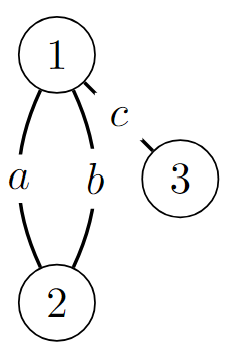

* Indepdent Sets: I = {a,b,c,ac,ab}
* Bases: B = {ac,ab}
* Circuits: C = {ab}

##### Indepdent Matroid Polytope Circuits

In [5]:
arcs = 3
B_mat = construct_B_ind_mat(arcs)
###all_circs includes the -1*g elementary vectors, while pos_circs are just g
all_circs, pos_circs = enumerate_circuits(B_mat)
print(pos_circs)

[[0 0 1]
 [0 1 0]
 [0 -1 1]
 [1 0 0]
 [-1 0 1]
 [-1 1 0]
 [-1 1 1]
 [1 -1 1]
 [-1 -1 1]]


## Example 2

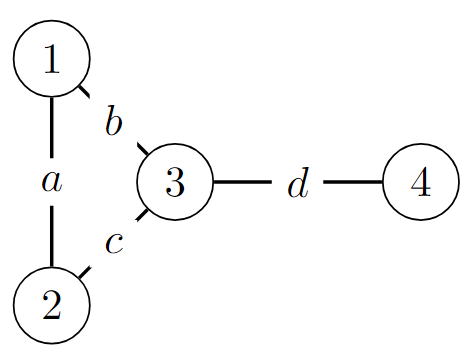

* Indepdent Sets: I = {a,b,c,d,ab,ac,ad,bc,bd,cd,abd,acd,bcd}
* Bases: B = {abd,acd,bcd}
* Circuits: C = {abc}

##### Indepdent Matroid Polytope Circuits

In [6]:
arcs = 4
B_mat = construct_B_ind_mat(arcs)
###all_circs includes the -1*g elementary vectors, while pos_circs are just g
all_circs, pos_circs = enumerate_circuits(B_mat)
print(pos_circs)

[[0 0 0 1]
 [0 0 1 0]
 [0 0 -1 1]
 [0 1 0 0]
 [0 -1 0 1]
 [0 -1 1 0]
 [0 -1 1 1]
 [0 1 -1 1]
 [0 -1 -1 1]
 [1 0 0 0]
 [-1 0 0 1]
 [-1 0 1 0]
 [-1 0 1 1]
 [1 0 -1 1]
 [-1 0 -1 1]
 [-1 1 0 0]
 [-1 1 0 1]
 [1 -1 0 1]
 [-1 -1 0 1]
 [-1 1 1 0]
 [1 -1 1 0]
 [-1 -1 1 0]
 [-1 1 1 1]
 [1 -1 -1 1]
 [1 -1 -1 2]
 [-1 1 -1 1]
 [-1 1 -2 1]
 [1 -1 1 1]
 [-1 1 -1 2]
 [1 -1 -2 1]
 [-1 -1 1 1]
 [-1 -2 1 1]
 [1 1 -1 1]
 [-1 -1 1 2]
 [1 -2 -1 1]
 [-1 -1 -1 1]
 [-1 -1 2 1]
 [-1 2 -1 1]
 [-2 -1 1 1]
 [-2 1 -1 1]
 [2 -1 -1 1]
 [-2 1 1 1]
 [1 -2 1 1]
 [1 1 -2 1]
 [-1 -1 -1 2]]
